# BSPF Analysis - Statistics Plots

In [1]:
import os
import pandas as pd
import numpy as np
import obspy as obs

import matplotlib.pyplot as plt

In [2]:
from functions.compute_orthogonal_distance_regression import __compute_orthogonal_distance_regression
from functions.compute_linear_regression import __compute_linear_regression

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [4]:
config = {}

config['path_to_data'] = data_path+"BSPF/data/"

config['path_to_figs'] = data_path+"BSPF/figures/"

config['path_to_catalogs'] = data_path+"BSPF/data/catalogs/"

config['catalog'] = ""

config['translation_type'] = "ACC"

## Load Data

In [5]:
data_amax = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_amax_{config['translation_type']}.pkl")

data_fmax = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_fmax_{config['translation_type']}.pkl")

data_snr = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_adr_snr_{config['translation_type']}.pkl")

data_adr_snr = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_adr_snr_{config['translation_type']}.pkl")

data_adr = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_adr_{config['translation_type']}.pkl")

data_adr_cc = pd.read_pickle(config['path_to_data']+f"bspf_analysisdata_adr_cc_{config['translation_type']}.pkl")


data_good = pd.read_pickle(config['path_to_catalogs']+"good_events_20221001_20230930.pkl")

In [6]:
print(f" AMAX:  all: {data_amax.origin.size} no_nan: {data_amax.origin.dropna().size}")
print(f" FMAX:  all: {data_fmax.origin.size} no_nan: {data_fmax.origin.dropna().size}")
print(f" SNR:  all: {data_snr.origin.size} no_nan: {data_snr.origin.dropna().size}")
print(f" ADR:  all: {data_adr.origin.size} no_nan: {data_adr.origin.dropna().size}")
print(f" CC:  all: {data_adr_cc.origin.size} no_nan: {data_adr_cc.origin.dropna().size}")

# data_amax = data_amax.dropna()
# data_snr = data_snr.dropna()
# data_adr = data_adr.dropna()

 AMAX:  all: 400 no_nan: 400
 FMAX:  all: 400 no_nan: 400
 SNR:  all: 389 no_nan: 389
 ADR:  all: 389 no_nan: 389
 CC:  all: 389 no_nan: 389


In [7]:
data_amax_fmax = pd.merge(left=data_amax, right=data_fmax, on=["Torigin", "Magnitude", "Edistance_km", "Hdistance_km", "CoincidenceSum"], how="inner")

In [8]:
# data_adr.nunique()
data_adr = data_adr.dropna()

## Modify Data

Filter data for events with coincidence sum 6

In [9]:
data_amax_cosum_6 = data_amax[data_amax.CoincidenceSum == 6]

data_amax_fmax_cosum_6 = data_amax_fmax[data_amax_fmax.CoincidenceSum == 6]

data_snr_cosum_6 = data_snr[data_snr.CoincidenceSum == 6]

data_adr_snr_cosum_6 = data_adr_snr[data_adr_snr.CoincidenceSum == 6]

data_adr_cosum_6 = data_adr[data_adr.CoincidenceSum == 6]

data_adr_cc_cosum_6 = data_adr_cc[data_adr_cc.CoincidenceSum == 6]

In [10]:
print(f" AMAX:      {data_amax_cosum_6.origin.size}")
print(f" SNR:       {data_snr_cosum_6.origin.size}")
print(f" ADR SNR:   {data_adr_snr_cosum_6.origin.size}")
print(f" ADR:       {data_adr_cosum_6.origin.size}")
print(f" ADR CC:    {data_adr_cc_cosum_6.origin.size}")

 AMAX:      117
 SNR:       111
 ADR SNR:   111
 ADR:       111
 ADR CC:    111


## Plots

In [11]:
# max_rot = []
# for nn in range(data_amax_cosum_6.shape[0]):
#     max_rot.append(np.nanmax([data_amax_cosum_6.iloc[nn].BSPF__E_amax, data_amax_cosum_6.iloc[nn].BSPF__N_amax, data_amax_cosum_6.iloc[nn].BSPF__Z_amax]))

max_rot = []
for nn in range(data_amax_cosum_6.shape[0]):
    max_rot.append(np.sqrt(data_amax_cosum_6.iloc[nn].BSPF__E_amax**2 + data_amax_cosum_6.iloc[nn].BSPF__N_amax**2 + data_amax_cosum_6.iloc[nn].BSPF__Z_amax**2))


In [12]:
def __makeplot(data1, data2, data3, data4, max_rot):

    import matplotlib

    fig, ax = plt.subplots(1,1,figsize=(15,5))

    font=14

    cmap = plt.get_cmap("viridis", 6)

    # dat = np.log10(data4.BSPF__N_snr)
    # dat = np.log10(data4.PFO_10_Z_snr)

    dat = np.log10(max_rot)

    ax.scatter(data1.Hdistance_km, data1.Magnitude, s=30, color="grey", zorder=1, label=f"all (N={len(data1)})")

    cax = ax.scatter(data2.Hdistance_km, data2.Magnitude, s=50, lw=0.5, edgecolors="k",
                     c=dat, cmap=cmap, zorder=2, label=f"co.sum 6 (N={len(data2)})", vmin=-7, vmax=-4)

    # cax = ax.scatter(data_good.Hdistance_km, data_good.Magnitude, s=50, lw=0.5, edgecolors="r",
    #                  c=dat, cmap=cmap, zorder=2, label=f"co.sum 6 (N={len(data2)})", vmin=-7, vmax=-4)


    ax.grid(ls="--", color="grey", alpha=0.6, zorder=0,which="both")
    ax.legend(loc=4, fontsize=font)

    ax.set_ylabel("magnitude", fontsize=font)
    ax.set_xlabel("hypocentral distance (km)", fontsize=font)

    ax.set_xscale("log")
    ax.set_xlim(left=7)

    cbar = plt.colorbar(cax, pad=0.02)
    # cbar.set_label(r"log$_{10}$(max. rotation rate) (rad/s)", fontsize=font)
    cbar.set_label(r"log$_{10}$($\sqrt{N^2 + E^2 + Z^2}$) (rad/s)", fontsize=font)
#     cbar.set_clim(0,4)

    ax.set_xticks([10, 20, 30, 40, 50, 100])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.show()
    return fig

In [13]:
# fig = __makeplot(data_amax, data_amax_cosum_6, data_snr, data_snr_cosum_6, max_rot)

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_mag_hdist.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

In [14]:
def __makeplot2(data1, data2, data3):

    import matplotlib

    max_rot1 = []
    for nn in range(data1.shape[0]):
        max_rot1.append(np.sqrt(data1.iloc[nn].BSPF__E_amax**2 + data1.iloc[nn].BSPF__N_amax**2 + data1.iloc[nn].BSPF__Z_amax**2))
    max_rot2 = []
    for nn in range(data2.shape[0]):
        max_rot2.append(np.sqrt(data2.iloc[nn].BSPF__E_amax**2 + data2.iloc[nn].BSPF__N_amax**2 + data2.iloc[nn].BSPF__Z_amax**2))
    max_rot3 = []
    for nn in range(data3.shape[0]):
        max_rot3.append(np.sqrt(data3.iloc[nn].BSPF__E_amax**2 + data3.iloc[nn].BSPF__N_amax**2 + data3.iloc[nn].BSPF__Z_amax**2))

    vmin, vmax = min([min(max_rot1), min(max_rot2), min(max_rot3)]), max([max(max_rot1), max(max_rot2), max(max_rot3)])
    vmin, vmax = -7.8, -6.0

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    font = 14

    cmap = plt.get_cmap("viridis", 9)

    cax = ax.scatter(data1.Hdistance_km, data1.Magnitude, s=30, marker="o", c=np.log10(max_rot1), cmap=cmap, zorder=2, 
                     label=f"CoIn. 4 (N={len(data1)})", vmin=vmin, vmax=vmax, edgecolors="black")

    ax.scatter(data2.Hdistance_km, data2.Magnitude, s=30, marker="^", c=np.log10(max_rot2), cmap=cmap, zorder=2, 
               label=f"CoIn. 5 (N={len(data2)})", vmin=vmin, vmax=vmax, edgecolors="black")
    ax.scatter(data3.Hdistance_km, data3.Magnitude, s=30, marker="s", c=np.log10(max_rot3), cmap=cmap, zorder=2, 
               label=f"CoIn. 6 (N={len(data3)})", vmin=vmin, vmax=vmax, edgecolors="black")


    ax.grid(ls="--", color="grey", alpha=0.6, zorder=0, which="both")
    ax.legend(loc=4, fontsize=font-1)

    ax.set_ylabel("Magnitude", fontsize=font)
    ax.set_xlabel("Hypocentral Distance (km)", fontsize=font)

    ax.set_xscale("log")
    ax.set_xlim(left=7)

    cbar = plt.colorbar(cax, pad=0.02, extend="both")
    # cbar.set_label(r"log$_{10}$(max. rotation rate) (rad/s)", fontsize=font)
    cbar.set_label(r"log$_{10}$($\sqrt{N^2 + E^2 + Z^2}$) (rad/s)", fontsize=font)
#     cbar.set_clim(0,4)

    ax.set_xticks([10, 20, 30, 40, 50, 100])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.show()
    return fig

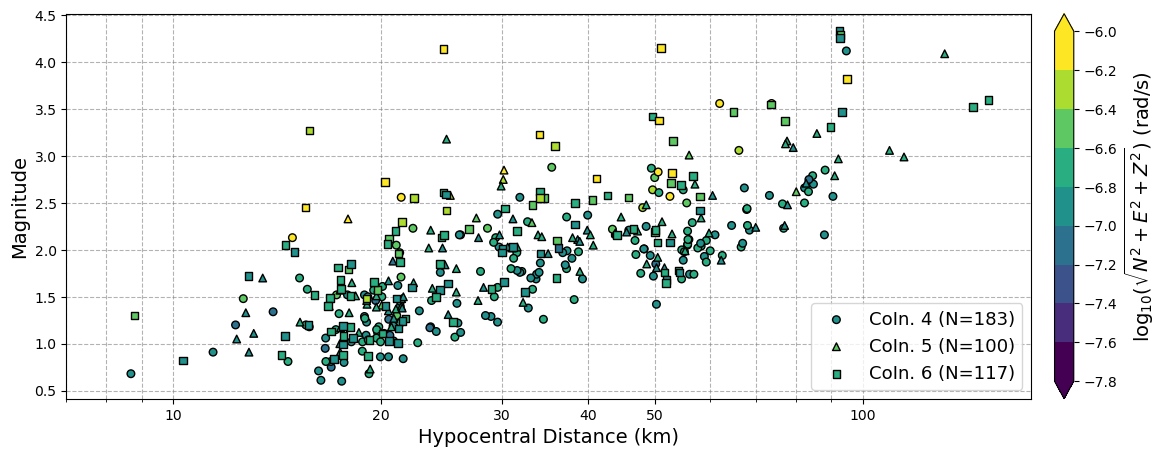

In [15]:
data1 = data_amax[data_amax.CoincidenceSum == 4]
data2 = data_amax[data_amax.CoincidenceSum == 5]
data3 = data_amax[data_amax.CoincidenceSum == 6]


fig = __makeplot2(data1, data2, data3)

fig.savefig(config['path_to_figs']+f"BSPF_statistics_mag_hdist2.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


### Plot Fmax

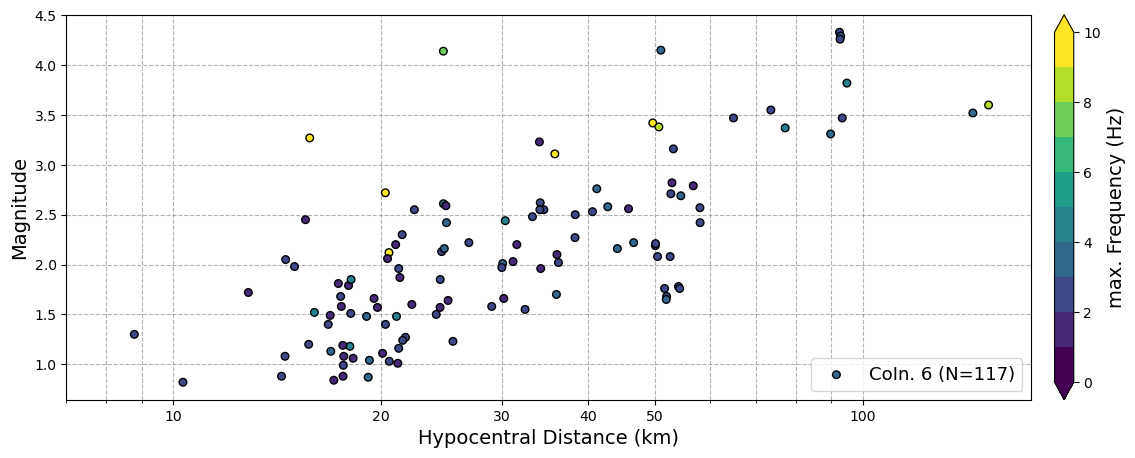

In [16]:
def __makeplot3(data1):

    import matplotlib


    # vmin, vmax = min([min(max_rot1), min(max_rot2), min(max_rot3)]), max([max(max_rot1), max(max_rot2), max(max_rot3)])
    vmin, vmax = 0, 10

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    font = 14

    cmap = plt.get_cmap("viridis", 10)

    cax = ax.scatter(data1.Hdistance_km, data1.Magnitude, s=30, marker="o", c=data1.BSPF__N_fmax, cmap=cmap, zorder=2,
                     label=f"CoIn. 6 (N={len(data1)})", vmin=vmin, vmax=vmax, edgecolors="black")


    ax.grid(ls="--", color="grey", alpha=0.6, zorder=0, which="both")
    ax.legend(loc=4, fontsize=font-1)

    ax.set_ylabel("Magnitude", fontsize=font)
    ax.set_xlabel("Hypocentral Distance (km)", fontsize=font)

    ax.set_xscale("log")
    ax.set_xlim(left=7)

    cbar = plt.colorbar(cax, pad=0.02, extend="both")
    # cbar.set_label(r"log$_{10}$(max. rotation rate) (rad/s)", fontsize=font)
    cbar.set_label(r"max. Frequency (Hz)", fontsize=font)
#     cbar.set_clim(0,4)

    ax.set_xticks([10, 20, 30, 40, 50, 100])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.show()
    return fig

fig = __makeplot3(data_amax_fmax_cosum_6);


## Polar Plot

In [17]:
def __polar_plot(data1, data2):

    r1 = data1.Edistance_km
    r2 = data2.Edistance_km
    theta1 = np.radians(data1.BAZ)
    theta2 = np.radians(data2.BAZ)


    import matplotlib
    cmap = matplotlib.colors.ListedColormap(["tab:red", "tab:orange", "tab:green"])


    data1.sort_values(by="Magnitude")

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    ax.scatter(theta1, r1, s=4**data1.Magnitude, c=data1.CoincidenceSum, cmap=cmap, zorder=2, edgecolors="k", alpha=0.7)
    # ax.scatter(theta2, r2, s=4**data2.Magnitude, lw=0.5, edgecolors="k", zorder=3)

    ## station
    ax.scatter(0, 0, zorder=3, s=100, marker='^', c="r", lw=0.8, edgecolors="k")

#     ax.set_rmax(2)

#     ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True, zorder=0)

    ax.set_title("", va='bottom')
    plt.show()
    return fig

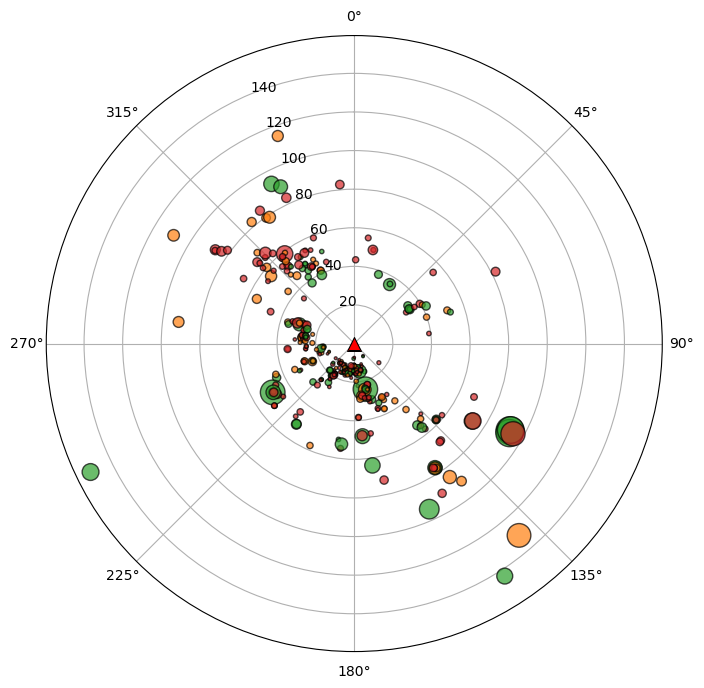

In [18]:
fig = __polar_plot(data_amax, data_snr)

fig.savefig(config['path_to_figs']+f"BSPF_statistics_polar.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Amplitude Maxima

In [19]:
def __makeplot_amax(data1, data2, xvalue):

    NJ = 4
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))

    font = 14

    scale = 1
    msize = 12
    linew = 0.5

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.PFO_10_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.PFO_10_Z_amax*scale, s=msize, color="tab:red", label="XPFO Z", lw=linew, edgecolors="k")

    ax[0,1].scatter(data1[xvalue], data1.PFO_10_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.PFO_10_N_amax*scale, s=msize, color="tab:red", label="XPFO N", lw=linew, edgecolors="k")

    ax[0,2].scatter(data1[xvalue], data1.PFO_10_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.PFO_10_E_amax*scale, s=msize, color="tab:red", label="XPFO E", lw=linew, edgecolors="k")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_amax*scale, s=msize, color="tab:red", label="ADR all Z", lw=linew, edgecolors="k")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_amax*scale, s=msize, color="tab:red", label="ADR all N", lw=linew, edgecolors="k")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_amax*scale, s=msize, color="tab:red", label="ADR all E", lw=linew, edgecolors="k")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_in_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_in_Z_amax*scale, s=msize, color="tab:red", label="ADR inner Z", lw=linew, edgecolors="k")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_in_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_in_N_amax*scale, s=msize, color="tab:red", label="ADR inner N", lw=linew, edgecolors="k")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_in_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_in_E_amax*scale, s=msize, color="tab:red", label="ADR inner E", lw=linew, edgecolors="k")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.BSPF__Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.BSPF__Z_amax*scale, s=msize, color="tab:red", label="BSPF Z", lw=linew, edgecolors="k")

    ax[3,1].scatter(data1[xvalue], data1.BSPF__N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.BSPF__N_amax*scale, s=msize, color="tab:red", label="BSPF N", lw=linew, edgecolors="k")

    ax[3,2].scatter(data1[xvalue], data1.BSPF__E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.BSPF__E_amax*scale, s=msize, color="tab:red", label="BSPF E", lw=linew, edgecolors="k")



    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=4)
            ax[3,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    for j in range(NI):
        ax[0,j].set_ylim(8e-7, 5e-2)
        ax[1,j].set_ylim(1e-11, 5e-5)
        ax[2,j].set_ylim(1e-10, 5e-5)
        ax[3,j].set_ylim(1e-8, 1e-4)

    ax[0,0].set_ylabel(r"Acc. (m/s$^2$)", fontsize=font)
    ax[1,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[3,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)

    plt.show()
    return fig

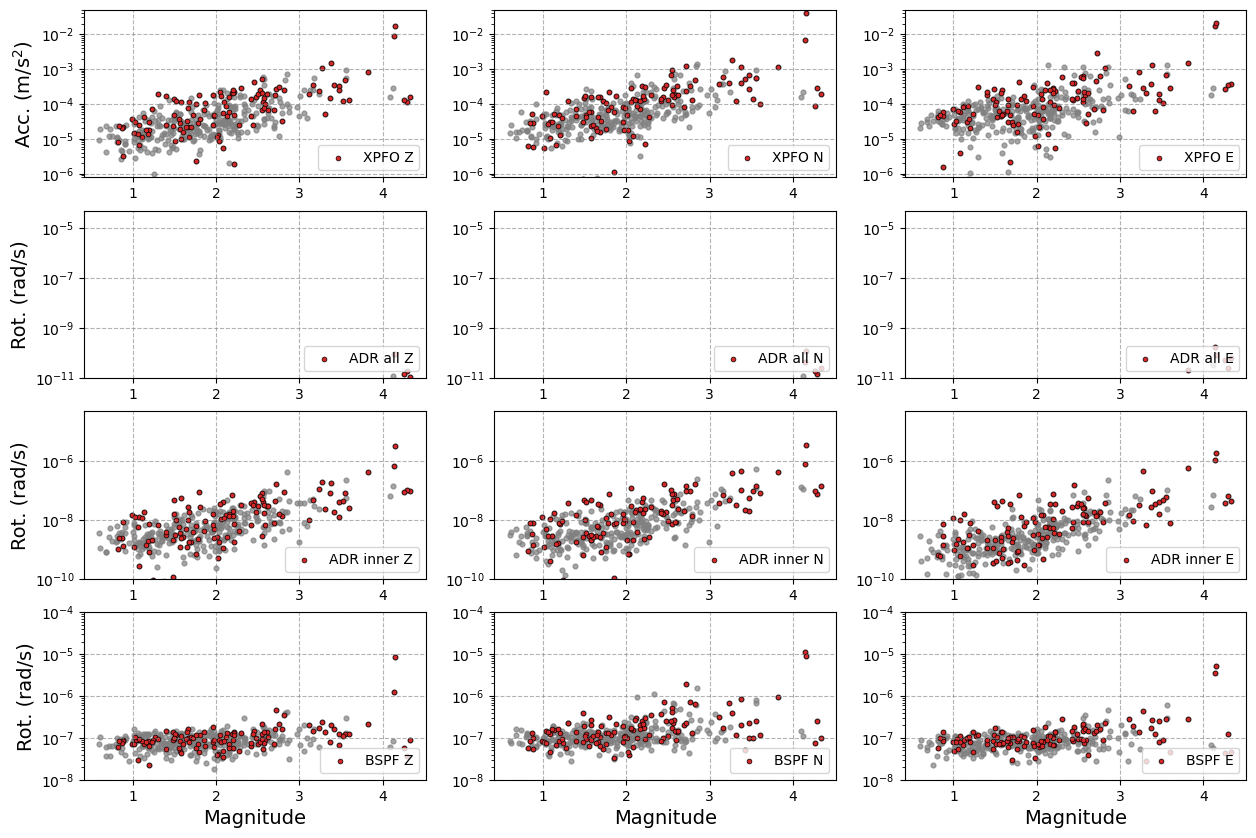

In [20]:
fig = __makeplot_amax(data_amax, data_amax_cosum_6, "Magnitude")

fig.savefig(config['path_to_figs']+f"BSPF_statistics_ampl_mag.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

In [21]:
def __makeplot_amax_colored(data1, data2, xvalue):

    NJ = 4
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))

    font = 14

    scale = 1
    msize = 12
    linew = 0.1

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.PFO_10_Z_amax*scale, s=msize, color="grey", alpha=0.7, label="XPFO Z")
    # ax[0,0].scatter(data2[xvalue], data2.PFO_10_Z_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[0,1].scatter(data1[xvalue], data1.PFO_10_N_amax*scale, s=msize, color="grey", alpha=0.7, label="XPFO N")
    # ax[0,1].scatter(data2[xvalue], data2.PFO_10_N_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[0,2].scatter(data1[xvalue], data1.PFO_10_E_amax*scale, s=msize, color="grey", alpha=0.7, label="XPFO E")
    # ax[0,2].scatter(data2[xvalue], data2.PFO_10_E_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR all Z")
    # ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR all N")
    # ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR all E")
    # ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_in_Z_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR inner Z")
    # ax[2,0].scatter(data2[xvalue], data2.RPFO_in_Z_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_in_N_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR inner N")
    # ax[2,1].scatter(data2[xvalue], data2.RPFO_in_N_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_in_E_amax*scale, s=msize, color="grey", alpha=0.7, label="ADR inner E")
    # ax[2,2].scatter(data2[xvalue], data2.RPFO_in_E_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.BSPF__Z_amax*scale, s=msize, color="grey", alpha=0.7, label="BSPF Z")
    # ax[3,0].scatter(data2[xvalue], data2.BSPF__Z_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[3,1].scatter(data1[xvalue], data1.BSPF__N_amax*scale, s=msize, color="grey", alpha=0.7, label="BSPF N")
    # ax[3,1].scatter(data2[xvalue], data2.BSPF__N_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")

    ax[3,2].scatter(data1[xvalue], data1.BSPF__E_amax*scale, s=msize, color="grey", alpha=0.7, label="BSPF E")
    # ax[3,2].scatter(data2[xvalue], data2.BSPF__E_amax*scale, s=msize, color="red", lw=linew, edgecolors="k")



    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=4)
            ax[3,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    for j in range(NI):
        ax[0,j].set_ylim(8e-7, 5e-2)
        ax[1,j].set_ylim(1e-11, 5e-5)
        ax[2,j].set_ylim(1e-10, 5e-5)
        ax[3,j].set_ylim(1e-8, 1e-4)

    ax[0,0].set_ylabel(r"Acc. (m/s$^2$)", fontsize=font)
    ax[1,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[3,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)

    plt.show()
    return fig

In [22]:
# fig = __makeplot_amax_colored(data_amax, data_amax_cosum_6, "Magnitude")

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_ampl_mag_colored.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

In [23]:
def __makeplot_amax2(data1, data2, xvalue):

    NJ = 4
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))

    font = 14

    scale = 1
    msize = 12
    linew = 0.1

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.PFO_10_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.PFO_10_Z_amax*scale, s=msize, color="red", label="XPFO Z", lw=linew, edgecolors="k")

    ax[0,1].scatter(data1[xvalue], data1.PFO_10_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.PFO_10_N_amax*scale, s=msize, color="red", label="XPFO N", lw=linew, edgecolors="k")

    ax[0,2].scatter(data1[xvalue], data1.PFO_10_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.PFO_10_E_amax*scale, s=msize, color="red", label="XPFO E", lw=linew, edgecolors="k")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_amax*scale, s=msize, color="red", label="ADR all Z", lw=linew, edgecolors="k")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_amax*scale, s=msize, color="red", label="ADR all N", lw=linew, edgecolors="k")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_amax*scale, s=msize, color="red", label="ADR all E", lw=linew, edgecolors="k")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_in_Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_in_Z_amax*scale, s=msize, color="red", label="ADR inner Z", lw=linew, edgecolors="k")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_in_N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_in_N_amax*scale, s=msize, color="red", label="ADR inner N", lw=linew, edgecolors="k")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_in_E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_in_E_amax*scale, s=msize, color="red", label="ADR inner E", lw=linew, edgecolors="k")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.BSPF__Z_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.BSPF__Z_amax*scale, s=msize, color="red", label="BSPF Z", lw=linew, edgecolors="k")

    ax[3,1].scatter(data1[xvalue], data1.BSPF__N_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.BSPF__N_amax*scale, s=msize, color="red", label="BSPF N", lw=linew, edgecolors="k")

    ax[3,2].scatter(data1[xvalue], data1.BSPF__E_amax*scale, s=msize, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.BSPF__E_amax*scale, s=msize, color="red", label="BSPF E", lw=linew, edgecolors="k")


    # for j in range(1,3):
    #     ax[j,0].set_ylim(1e-9, 1e-5)
    #     ax[j,1].set_ylim(1e-9, 1e-5)
    #     ax[j,2].set_ylim(1e-9, 1e-5)

    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=1)
            ax[3,j].set_xlabel("Hypocenter Distance (km)", fontsize=font)
#             ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0, which="both")
            ax[i,j].set_xlim(left=10)

    ax[0,0].set_ylabel(r"Acc. (m/s$^2$)", fontsize=font)
    ax[1,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)
    ax[3,0].set_ylabel(r"Rot. (rad/s)", fontsize=font)

    plt.show()

In [24]:
# __makeplot_amax2(data_amax, data_amax_cosum_6, "Hdistance_km")

## Compare ADR - BSPF maximal amplitudes

In [25]:
def __makeplot_compare_amax(data2):

    NJ = 3
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10), sharex=True)

    font = 14
    scale = 1
    msize = 12
    linew = 0.5




    ## _________________________


    ax[0,0].scatter(data2.RPFO_in_Z_adr,data2.BSPF_in_Z_adr,  s=msize, color="tab:red", label="RPFO inner Z", lw=linew, edgecolors="k", zorder=3)

    ax[0,1].scatter(data2.RPFO_in_N_adr,data2.BSPF_in_N_adr,  s=msize, color="tab:red", label="RPFO inner N", lw=linew, edgecolors="k", zorder=3)

    ax[0,2].scatter(data2.RPFO_in_E_adr, data2.BSPF_in_E_adr, s=msize, color="tab:red", label="RPFO inner E", lw=linew, edgecolors="k", zorder=3)

    ## _________________________


    ax[1,0].scatter(data2.RPFO_mi_Z_adr, data2.BSPF_mi_Z_adr, s=msize, color="tab:red", label="ADR mid Z", lw=linew, edgecolors="k", zorder=3)

    ax[1,1].scatter(data2.RPFO_mi_N_adr,data2.BSPF_mi_N_adr,  s=msize, color="tab:red", label="ADR mid N", lw=linew, edgecolors="k", zorder=3)

    ax[1,2].scatter(data2.RPFO_mi_E_adr, data2.BSPF_mi_E_adr, s=msize, color="tab:red", label="ADR mid E", lw=linew, edgecolors="k", zorder=3)


    ## _________________________


    ax[2,0].scatter(data2.RPFO_al_Z_adr, data2.BSPF_al_Z_adr, s=msize, color="tab:red", label="ADR all Z", lw=linew, edgecolors="k", zorder=3)

    ax[2,1].scatter(data2.RPFO_al_N_adr, data2.BSPF_al_N_adr, s=msize, color="tab:red", label="ADR all N", lw=linew, edgecolors="k", zorder=3)

    ax[2,2].scatter(data2.RPFO_al_E_adr, data2.BSPF_al_E_adr, s=msize, color="tab:red", label="ADR all E", lw=linew, edgecolors="k", zorder=3)



    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            ax[i,j].set_xscale("log")
            ax[2,j].set_xlabel(r"ADR (rad/s)", fontsize=font)

            ax[i,j].legend(loc=2)
            ax[i,j].grid(ls="-", color="lightgrey", alpha=0.6, zorder=0, which="both")

    for j in range(NI):
        # ax[0,j].set_title(f"0.16-16.5 Hz")
        # ax[1,j].set_title("0.03-3.3 Hz")
        # ax[2,j].set_title(f"0.02-1.3 Hz")
        ax[0,j].set_title(f"1.0-6.0 Hz")
        ax[1,j].set_title(f"0.5-1.0 Hz")
        ax[2,j].set_title(f"0.1-0.5 Hz")

    for i in range(NI):
        for j in range(NJ):
            ax[i,j].set_xlim(1e-15, 2e-5)
            ax[i,j].set_ylim(1e-15, 2e-5)

            ## plot one diagonal
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(1e-12, 10e-5, 1000), ls="--", c="k", zorder=2)
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(1e-8, 1e-8, 1000), ls=":", c="tab:purple", zorder=2)
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(3e-8, 3e-8, 1000), ls=":", c="tab:blue", zorder=2)

    ax[0,0].set_ylabel(r"BSPF inner (rad/s)", fontsize=font)
    ax[1,0].set_ylabel(r"BSPF mid (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"BSPF all (rad/s)", fontsize=font)

    plt.show();
    return fig

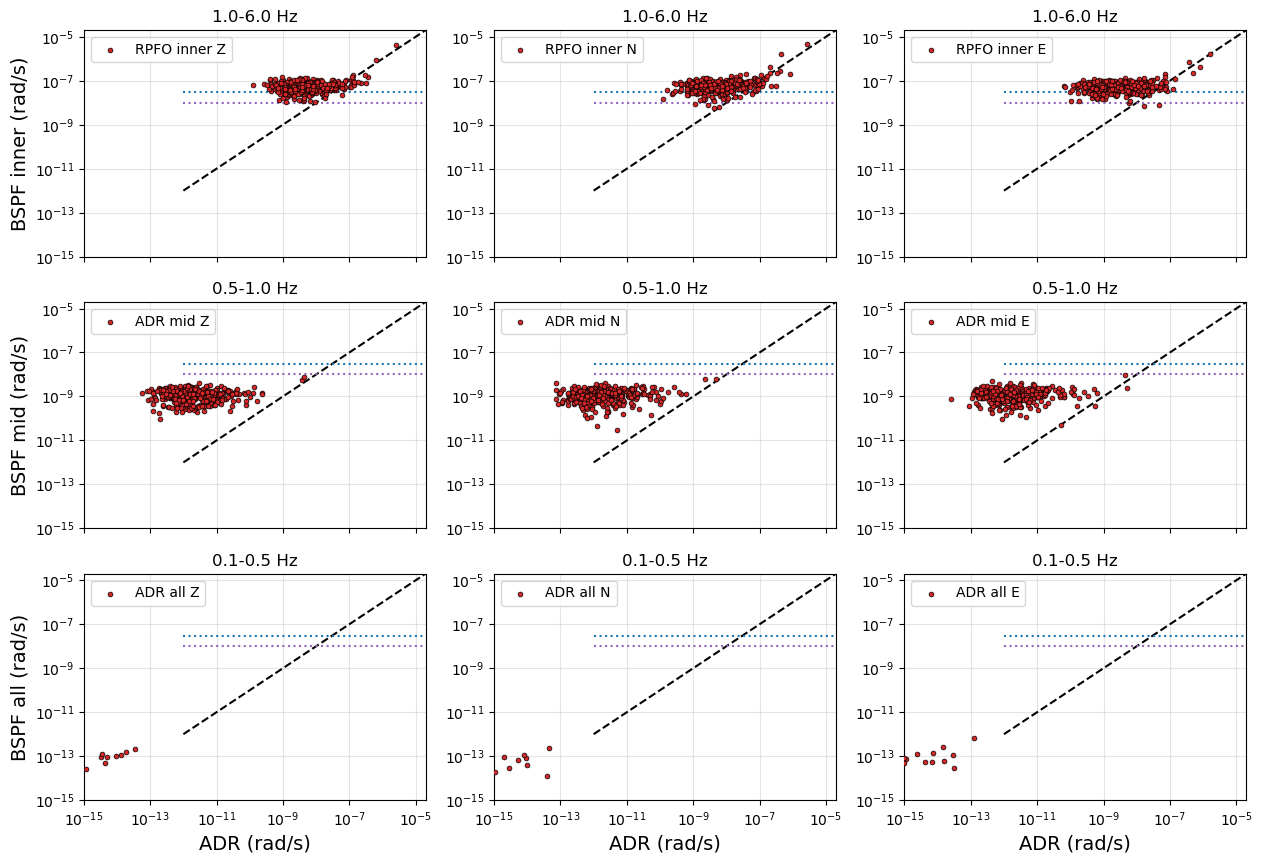

In [26]:
fig = __makeplot_compare_amax(data_adr)

fig.savefig(config['path_to_figs']+f"BSPF_statistics_amplitude_comparison_ADR_BSPF.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

In [27]:
def __makeplot_compare_amax2(data1, data2):

    NJ = 3
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10), sharex=True)

    font = 14
    scale = 1
    msize = 12
    linew = 0.5




    ## _________________________


    ax[0,0].scatter(data1.RPFO_in_Z_adr,data1.BSPF_in_Z_adr,  s=msize, color="grey", alpha=1, zorder=2)
    ax[0,0].scatter(data2.RPFO_in_Z_adr,data2.BSPF_in_Z_adr,  s=msize, color="tab:red", label="RPFO inner Z", lw=linew, edgecolors="k", zorder=3)

    ax[0,1].scatter(data1.RPFO_in_N_adr,data1.BSPF_in_N_adr,  s=msize, color="grey", alpha=1, zorder=2)
    ax[0,1].scatter(data2.RPFO_in_N_adr,data2.BSPF_in_N_adr,  s=msize, color="tab:red", label="RPFO inner N", lw=linew, edgecolors="k", zorder=3)

    ax[0,2].scatter(data1.RPFO_in_E_adr, data1.BSPF_in_E_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[0,2].scatter(data2.RPFO_in_E_adr, data2.BSPF_in_E_adr, s=msize, color="tab:red", label="RPFO inner E", lw=linew, edgecolors="k", zorder=3)

    ## _________________________


    ax[1,0].scatter(data1.RPFO_mi_Z_adr, data1.BSPF_mi_Z_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[1,0].scatter(data2.RPFO_mi_Z_adr, data2.BSPF_mi_Z_adr, s=msize, color="tab:red", label="ADR mid Z", lw=linew, edgecolors="k", zorder=3)

    ax[1,1].scatter(data1.RPFO_mi_N_adr, data1.BSPF_mi_N_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[1,1].scatter(data2.RPFO_mi_N_adr,data2.BSPF_mi_N_adr,  s=msize, color="tab:red", label="ADR mid N", lw=linew, edgecolors="k", zorder=3)

    ax[1,2].scatter(data1.RPFO_mi_E_adr, data1.BSPF_mi_E_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[1,2].scatter(data2.RPFO_mi_E_adr, data2.BSPF_mi_E_adr, s=msize, color="tab:red", label="ADR mid E", lw=linew, edgecolors="k", zorder=3)


    ## _________________________


    ax[2,0].scatter(data1.RPFO_al_Z_adr,data1.BSPF_al_Z_adr,  s=msize, color="grey", alpha=1, zorder=2)
    ax[2,0].scatter(data2.RPFO_al_Z_adr, data2.BSPF_al_Z_adr, s=msize, color="tab:red", label="ADR all Z", lw=linew, edgecolors="k", zorder=3)

    ax[2,1].scatter(data1.RPFO_al_N_adr, data1.BSPF_al_N_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[2,1].scatter(data2.RPFO_al_N_adr, data2.BSPF_al_N_adr, s=msize, color="tab:red", label="ADR all N", lw=linew, edgecolors="k", zorder=3)

    ax[2,2].scatter(data1.RPFO_al_E_adr, data1.BSPF_al_E_adr, s=msize, color="grey", alpha=1, zorder=2)
    ax[2,2].scatter(data2.RPFO_al_E_adr, data2.BSPF_al_E_adr, s=msize, color="tab:red", label="ADR all E", lw=linew, edgecolors="k", zorder=3)



    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            ax[i,j].set_xscale("log")
            ax[2,j].set_xlabel(r"ADR (rad/s)", fontsize=font)

            ax[i,j].legend(loc=2)
            ax[i,j].grid(ls="-", color="lightgrey", alpha=0.6, zorder=0, which="both")

    for j in range(NI):
        # ax[0,j].set_title(f"0.16-16.5 Hz")
        # ax[1,j].set_title("0.03-3.3 Hz")
        # ax[2,j].set_title(f"0.02-1.3 Hz")
        ax[0,j].set_title(f"1.0-16.0 Hz")
        ax[1,j].set_title("0.5-3.0 Hz")
        ax[2,j].set_title(f"0.05- Hz")

    for i in range(NI):
        for j in range(NJ):
            ax[i,j].set_xlim(1e-11, 2e-5)
            ax[i,j].set_ylim(1e-11, 2e-5)

            ## plot one diagonal
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(1e-12, 10e-5, 1000), ls="--", c="k", zorder=2)
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(1e-8, 1e-8, 1000), ls=":", c="tab:purple", zorder=2)
            ax[i,j].plot(np.linspace(1e-12, 10e-5, 1000), np.linspace(3e-8, 3e-8, 1000), ls=":", c="tab:blue", zorder=2)

    ax[0,0].set_ylabel(r"BSPF inner (rad/s)", fontsize=font)
    ax[1,0].set_ylabel(r"BSPF mid (rad/s)", fontsize=font)
    ax[2,0].set_ylabel(r"BSPF all (rad/s)", fontsize=font)

    plt.show();
    return fig

In [28]:
# fig = __makeplot_compare_amax2(data_adr, data_adr_cosum_6)

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_amplitude_comparison_ADR_BSPF_2.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## CC values

In [29]:
def __makeplot_cc(data1, data2, xvalue):

    NJ = 4
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))

    font = 14

    scale = 1
    msize = 12
    linew = 0.1

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.BSPF_in_Z_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.BSPF_in_Z_adr*scale, s=msize, color="red", label="BSPF Z", lw=linew, edgecolors="k")

    ax[0,1].scatter(data1[xvalue], data1.BSPF_in_N_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.BSPF_in_N_adr*scale, s=msize, color="red", label="BSPF N", lw=linew, edgecolors="k")

    ax[0,2].scatter(data1[xvalue], data1.BSPF_in_E_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.BSPF_in_E_adr*scale, s=msize, color="red", label="BSPF E", lw=linew, edgecolors="k")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_adr*scale, s=msize, color="red", label="ADR all Z", lw=linew, edgecolors="k")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_adr*scale, s=msize, color="red", label="ADR all N", lw=linew, edgecolors="k")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_adr*scale, s=msize, color="red", label="ADR all E", lw=linew, edgecolors="k")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_mi_Z_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_mi_Z_adr*scale, s=msize, color="red", label="ADR mid Z", lw=linew, edgecolors="k")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_mi_N_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_mi_N_adr*scale, s=msize, color="red", label="ADR mid N", lw=linew, edgecolors="k")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_mi_E_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_mi_E_adr*scale, s=msize, color="red", label="ADR mid E", lw=linew, edgecolors="k")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.RPFO_in_Z_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.RPFO_in_Z_adr*scale, s=msize, color="red", label="ADR inner Z", lw=linew, edgecolors="k")

    ax[3,1].scatter(data1[xvalue], data1.RPFO_in_N_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.RPFO_in_N_adr*scale, s=msize, color="red", label="ADR inner N", lw=linew, edgecolors="k")

    ax[3,2].scatter(data1[xvalue], data1.RPFO_in_E_adr*scale, s=msize, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.RPFO_in_E_adr*scale, s=msize, color="red", label="ADR inner E", lw=linew, edgecolors="k")



    for i in range(NJ):
        for j in range(NI):
            # ax[i,j].set_yscale("log")
            ax[i,j].set_ylim(-1.1, 1.1)
            ax[i,j].legend(loc=4)
            ax[3,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[0,0].set_ylabel(r"Rot. CC", fontsize=font)
    ax[1,0].set_ylabel(r"Rot. CC", fontsize=font)
    ax[2,0].set_ylabel(r"Rot. CC", fontsize=font)
    ax[3,0].set_ylabel(r"Rot. CC", fontsize=font)

    plt.show()
    return fig

In [30]:
# fig = __makeplot_cc(data_adr_cc, data_adr_cc_cosum_6, "Magnitude")

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_cc_mag.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

In [31]:
def __makeplot_cc2(data1):

    NJ = 4
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15, 10))

    font = 14

    msize = 12
    linew = 0.5

    cmap = plt.get_cmap("seismic")

    ## _________________________

    cax = ax[0,0].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_Z_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="BSPF Z", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[0,1].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_N_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="BSPF N", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[0,2].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_E_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="BSPF E", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    ## _________________________

    cax = ax[1,0].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_al_Z_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR all Z", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[1,1].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_al_N_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR all N", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[1,2].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_al_E_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR all E", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    ## _________________________

    cax = ax[2,0].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_mi_Z_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR mid Z", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[2,1].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_mi_N_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR mid N", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[2,2].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_mi_E_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR mid E", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    ## _________________________

    cax = ax[3,0].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_in_Z_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR inner Z", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[3,1].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_in_N_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR inner N", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)

    cax = ax[3,2].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.RPFO_in_E_adr, cmap=cmap, vmin=-1, vmax=1, s=msize, label="ADR inner E", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02)
    cbar.set_label(r"CC-Coefficient", fontsize=font-1)



    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_xscale("log")
            ax[i,j].set_ylim(0, 5)
            ax[i,j].legend(loc=4)
            ax[3,j].set_xlabel("Hypocentral Distance (km)", fontsize=font)
            # ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[0,0].set_ylabel(r"Magnitude", fontsize=font)
    ax[1,0].set_ylabel(r"Magnitude", fontsize=font)
    ax[2,0].set_ylabel(r"Magnitude", fontsize=font)
    ax[3,0].set_ylabel(r"Magnitude", fontsize=font)

    plt.show()
    return fig

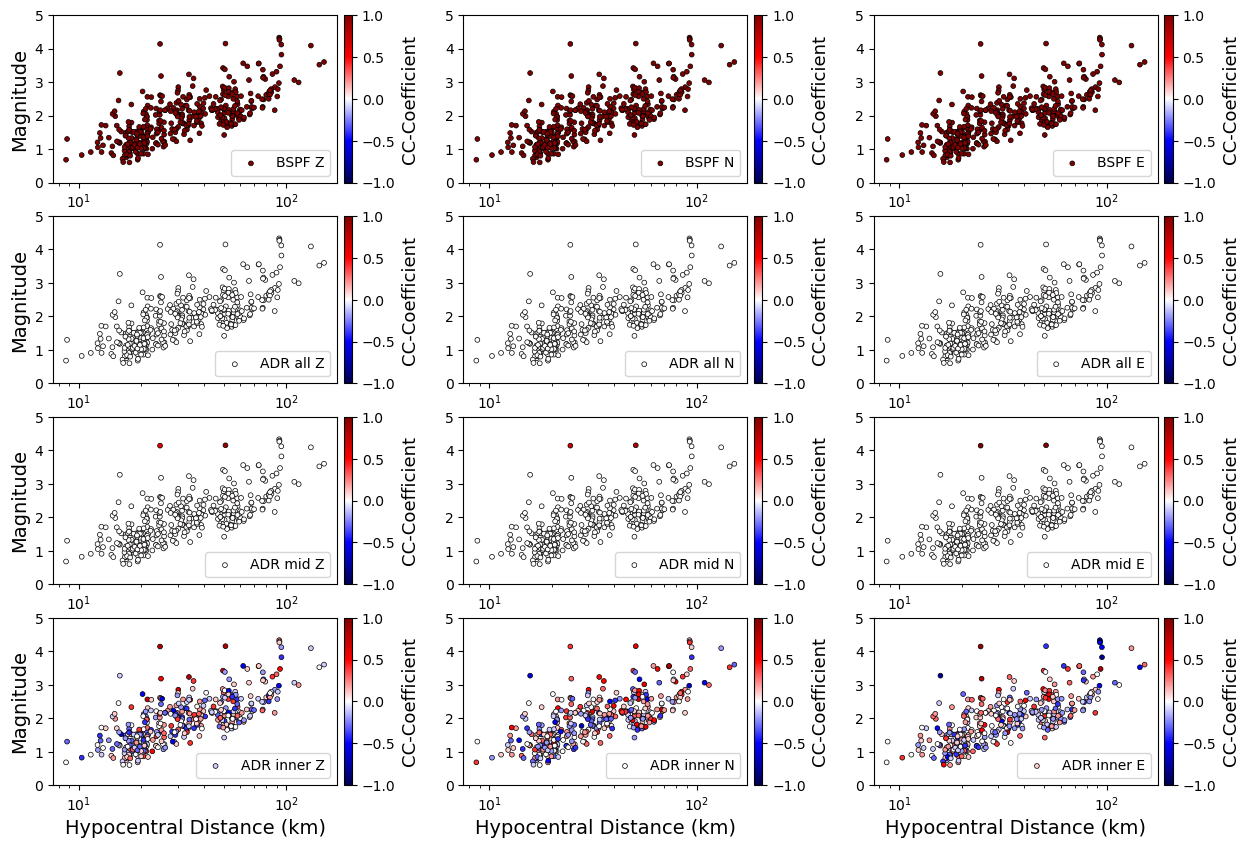

In [32]:
fig = __makeplot_cc2(data_adr_cc)

fig.savefig(config['path_to_figs']+f"BSPF_statistics_cc.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


## Signal-to-Noise Ratio

In [33]:
data_adr_snr_cosum_6 = data_adr_snr_cosum_6[data_adr_snr_cosum_6.Magnitude > 1]
# data_snr_cosum_6 = data_snr_cosum_6[data_snr_cosum_6.Edistance_km < 40]


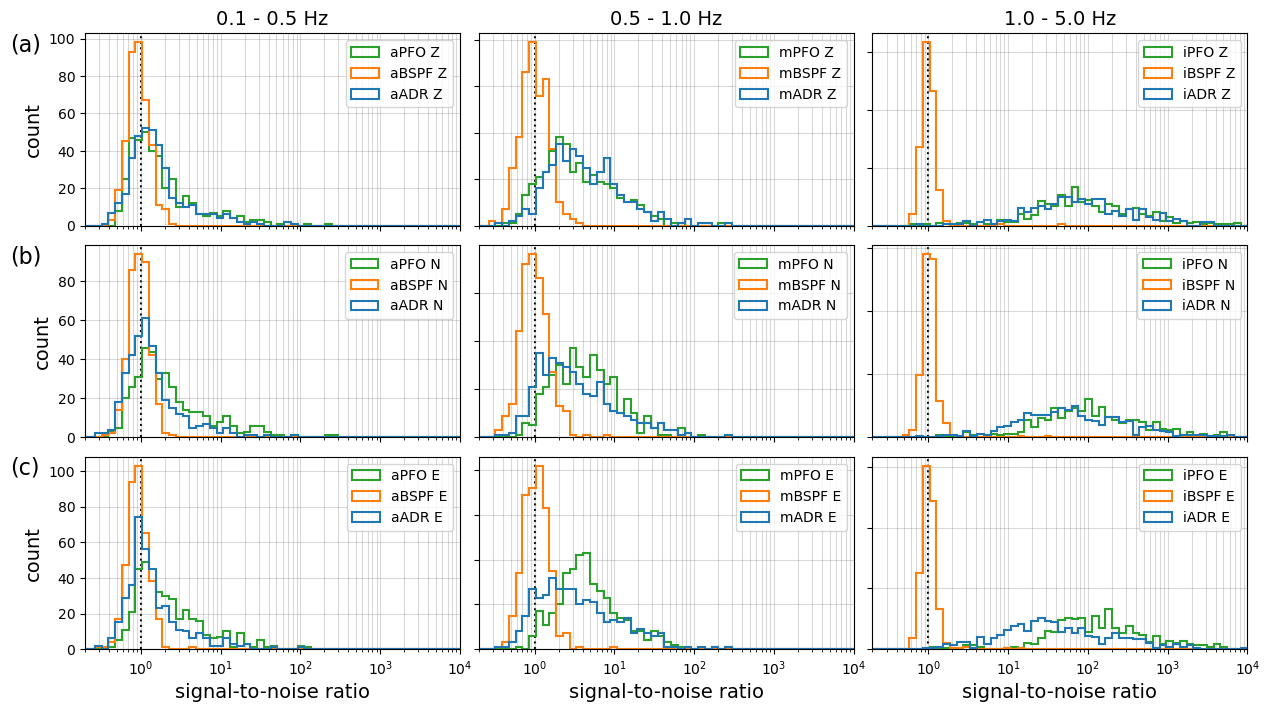

In [34]:
def __makeplot_snr(data1):

    NJ = 3
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15, 8), sharey=False, sharex=True)

    font = 14
    scale = 1
    msize = 12

    plt.subplots_adjust(hspace=0.1, wspace=0.05)

    nbins=60
    rw = 1
    xrange=(2e-1, 1e4)
    htype = "step"
    lw = 1.5

    ## _________________________

    logbins = np.logspace(np.log10(0.1), np.log10(1e4), nbins)

    al_Z = [data1.RPFO_al_Z_snr,  data1.BSPF_al_Z_snr, data1.PFO_al_Z_snr]
    ax[0,0].hist(al_Z, bins=logbins, rwidth=rw, zorder=2, label=["aADR Z","aBSPF Z","aPFO Z"], range=xrange, histtype=htype, lw=lw)

    al_N = [data1.RPFO_al_N_snr,  data1.BSPF_al_N_snr, data1.PFO_al_N_snr]
    ax[1,0].hist(al_N, bins=logbins, rwidth=rw, zorder=2, label=["aADR N","aBSPF N","aPFO N"], range=xrange, histtype=htype, lw=lw)

    al_E = [data1.RPFO_al_E_snr,  data1.BSPF_al_E_snr, data1.PFO_al_E_snr]
    ax[2,0].hist(al_E, bins=logbins, rwidth=rw, zorder=2, label=["aADR E","aBSPF E","aPFO E"], range=xrange, histtype=htype, lw=lw)


    mi_Z = [data1.RPFO_mi_Z_snr,  data1.BSPF_mi_Z_snr, data1.PFO_mi_Z_snr]
    ax[0,1].hist(mi_Z, bins=logbins, rwidth=rw, zorder=2, label=["mADR Z","mBSPF Z","mPFO Z"], range=xrange, histtype=htype, lw=lw)

    mi_N = [data1.RPFO_mi_N_snr,  data1.BSPF_mi_N_snr, data1.PFO_mi_N_snr]
    ax[1,1].hist(mi_N, bins=logbins, rwidth=rw, zorder=2, label=["mADR N","mBSPF N","mPFO N"], range=xrange, histtype=htype, lw=lw)

    mi_E = [data1.RPFO_mi_E_snr,  data1.BSPF_mi_E_snr, data1.PFO_mi_E_snr]
    ax[2,1].hist(mi_E, bins=logbins, rwidth=rw, zorder=2, label=["mADR E","mBSPF E","mPFO E"], range=xrange, histtype=htype, lw=lw)


    in_Z = [data1.RPFO_in_Z_snr,  data1.BSPF_in_Z_snr, data1.PFO_in_Z_snr]
    ax[0,2].hist(in_Z, bins=logbins, rwidth=rw, zorder=2, label=["iADR Z","iBSPF Z","iPFO Z"], range=xrange, histtype=htype, lw=lw)

    mi_N = [data1.RPFO_in_N_snr,  data1.BSPF_in_N_snr, data1.PFO_in_N_snr]
    ax[1,2].hist(mi_N, bins=logbins, rwidth=rw, zorder=2, label=["iADR N","iBSPF N","iPFO N"], range=xrange, histtype=htype, lw=lw)

    mi_E = [data1.RPFO_in_E_snr,  data1.BSPF_in_E_snr, data1.PFO_in_E_snr]
    ax[2,2].hist(mi_E, bins=logbins, rwidth=rw, zorder=2, label=["iADR E","iBSPF E","iPFO E"], range=xrange, histtype=htype, lw=lw)



    for i in range(NJ):
        for j in range(NI):
            if i < 2:
                ax[i,j].set_xscale("log")
                # ax[i,j].set_yscale("log")
                # ax[i,j].set_ylim(0, 60)

            # plot vertical line for ratio = 1
            ax[i,j].axvline(1, 0, 1000, color="k" , ls=":", zorder=1)

            ax[i,j].set_xlim(2e-1, 1e4)

            ax[i,j].legend(loc=1)

            ax[2,j].set_xlabel("signal-to-noise ratio", fontsize=font)

            ax[i,j].grid(ls="-", color="grey", alpha=0.3, zorder=0, which="both")

            if j > 0:
                ax[i,j].set_yticklabels([])

            ax[i,0].set_ylabel(r"count", fontsize=font)

    ax[0,2].set_title("1.0 - 5.0 Hz", fontsize=font)
    ax[0,1].set_title("0.5 - 1.0 Hz", fontsize=font)
    ax[0,0].set_title("0.1 - 0.5 Hz", fontsize=font)

    for _k, ll in enumerate(['(a)', '(b)', '(c)']):
        ax[_k, 0].text(-.2, 1., ll, ha='left', va='top', transform=ax[_k, 0].transAxes, fontsize=font+2)

    plt.show()
    return fig

fig = __makeplot_snr(data_adr_snr)

fig.savefig(config['path_to_figs']+f"BSPF_statistics_adr_snr_hist.png", dpi=150, bbox_inches='tight', pad_inches=0.05)


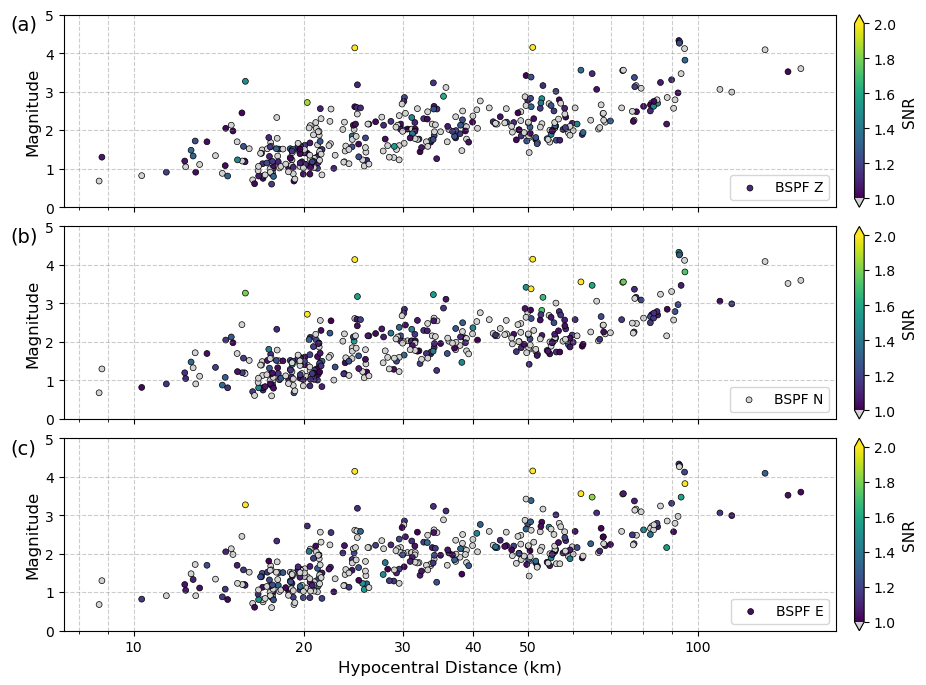

In [35]:
def __makeplot_snr2(data1):

    import matplotlib

    NJ = 3
    NI = 1

    fig, ax = plt.subplots(NJ, NI, figsize=(12, 8), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    font = 12

    msize = 18
    linew = 0.5

    cmap = plt.get_cmap("viridis")
    cmap.set_under("lightgrey")

    ## _________________________

    cax = ax[0].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_Z_snr, cmap=cmap, vmin=1, vmax=2,
                        s=msize, label="BSPF Z", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02, extend="both")
    cbar.set_label(r"SNR", fontsize=font-1)

    cax = ax[1].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_N_snr, cmap=cmap, vmin=1, vmax=2,
                        s=msize, label="BSPF N", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02, extend="both")
    cbar.set_label(r"SNR", fontsize=font-1)

    cax = ax[2].scatter(data1.Hdistance_km, data1.Magnitude, c=data1.BSPF_in_E_snr, cmap=cmap, vmin=1, vmax=2,
                        s=msize, label="BSPF E", lw=linew, edgecolors="k")
    cbar = plt.colorbar(cax, pad=0.02, extend="both")
    cbar.set_label(r"SNR", fontsize=font-1)


    for j in range(NJ):
        ax[j].set_xscale("log")
        ax[j].set_ylim(0, 5)
        ax[j].legend(loc=4)
        ax[j].grid(which="both", ls="--", color="grey", alpha=0.4, zorder=0)
        ax[j].set_ylabel(r"Magnitude", fontsize=font)

        ax[j].set_xticks([10, 20, 30, 40, 50, 100])
        ax[j].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax[NJ-1].set_xlabel("Hypocentral Distance (km)", fontsize=font)

    for _k, ll in enumerate(['(a)', '(b)', '(c)']):
        ax[_k].text(-.07, 1., ll, ha='left', va='top', transform=ax[_k].transAxes, fontsize=font+2)

    plt.show()
    return fig

fig = __makeplot_snr2(data_snr);
# fig = __makeplot_snr2(data_snr_cosum_6);

fig.savefig(config['path_to_figs']+f"BSPF_statistics_snr.png", dpi=150, bbox_inches='tight', pad_inches=0.05)



In [36]:
def __makeplot_snr(data1, data2, xvalue):

    NJ = 5
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15, 10), sharey=False, sharex=True)

    font = 14
    scale = 1e0
    msize = 12

    plt.subplots_adjust(hspace=0.1, wspace=0.05)

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.PFO_10_Z_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[0,0].scatter(data2[xvalue], data2.PFO_10_Z_snr*scale, s=msize, zorder=2, label="PFO Z", edgecolor="k", lw=0.5, color="tab:red")

    ax[0,1].scatter(data1[xvalue], data1.PFO_10_N_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[0,1].scatter(data2[xvalue], data2.PFO_10_N_snr*scale, s=msize, zorder=2, label="PFO N", edgecolor="k", lw=0.5, color="tab:red")

    ax[0,2].scatter(data1[xvalue], data1.PFO_10_E_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[0,2].scatter(data2[xvalue], data2.PFO_10_E_snr*scale, s=msize, zorder=2, label="PFO E", edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_snr*scale, s=msize, zorder=2, label="ADR all Z", edgecolor="k", lw=0.5, color="tab:red")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_snr*scale, s=msize, zorder=2, label="ADR all N", edgecolor="k", lw=0.5, color="tab:red")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_snr*scale, s=msize, zorder=2, label="ADR all E", edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_mi_Z_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[2,0].scatter(data2[xvalue], data2.RPFO_mi_Z_snr*scale, s=msize, zorder=2, label="ADR mid Z", edgecolor="k", lw=0.5, color="tab:red")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_mi_N_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[2,1].scatter(data2[xvalue], data2.RPFO_mi_N_snr*scale, s=msize, zorder=2, label="ADR mid N", edgecolor="k", lw=0.5, color="tab:red")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_mi_E_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[2,2].scatter(data2[xvalue], data2.RPFO_mi_E_snr*scale, s=msize, zorder=2, label="ADR mid E", edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.RPFO_in_Z_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[3,0].scatter(data2[xvalue], data2.RPFO_in_Z_snr*scale, s=msize, zorder=2, label="ADR inner Z", edgecolor="k", lw=0.5, color="tab:red")

    ax[3,1].scatter(data1[xvalue], data1.RPFO_in_N_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[3,1].scatter(data2[xvalue], data2.RPFO_in_N_snr*scale, s=msize, zorder=2, label="ADR inner N", edgecolor="k", lw=0.5, color="tab:red")

    ax[3,2].scatter(data1[xvalue], data1.RPFO_in_E_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[3,2].scatter(data2[xvalue], data2.RPFO_in_E_snr*scale, s=msize, zorder=2, label="ADR inner E", edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[4,0].scatter(data1[xvalue], data1.BSPF__Z_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[4,0].scatter(data2[xvalue], data2.BSPF__Z_snr*scale, s=msize, zorder=2, label="BSPF Z", edgecolor="k", lw=0.5, color="tab:red")

    ax[4,1].scatter(data1[xvalue], data1.BSPF__N_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[4,1].scatter(data2[xvalue], data2.BSPF__N_snr*scale, s=msize, zorder=2, label="BSPF N", edgecolor="k", lw=0.5, color="tab:red")

    ax[4,2].scatter(data1[xvalue], data1.BSPF__E_snr*scale, s=msize, zorder=2, color="grey", alpha=0.7)
    ax[4,2].scatter(data2[xvalue], data2.BSPF__E_snr*scale, s=msize, zorder=2, label="BSPF E", edgecolor="k", lw=0.5, color="tab:red")


    for i in range(NJ):
        for j in range(NI):
            if i < 5:
                ax[i,j].set_yscale("log")
                ax[i,j].set_ylim(0, 1e4)

            ax[i,j].legend(loc=2)
            ax[4,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)
            ax[4,j].set_ylim(0, 30)
            if j > 0:
                ax[i,j].set_yticklabels([])

    ax[0,0].set_ylabel(r"SNR", fontsize=font)
    ax[1,0].set_ylabel(r"SNR", fontsize=font)
    ax[2,0].set_ylabel(r"SNR", fontsize=font)
    ax[3,0].set_ylabel(r"SNR", fontsize=font)
    ax[4,0].set_ylabel(r"SNR", fontsize=font)

    plt.show()
    return fig

In [37]:
# fig = __makeplot_snr(data_snr, data_snr_cosum_6, "Magnitude")

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_snr_magnitude.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


In [38]:
def __makeplot_snr_colored(data1, data2, xvalue):

    NJ = 5
    NI = 3

    fig, ax = plt.subplots(NJ, NI, figsize=(15, 10), sharey=True, sharex=True)

    font = 14
    scale = 1e0
    msize = 12

    plt.subplots_adjust(hspace=0.1, wspace=0.05)

    import matplotlib
    cmap = matplotlib.colors.ListedColormap(["tab:red", "tab:orange", "tab:green"])

    ## _________________________

    ax[0,0].scatter(data1[xvalue], data1.PFO_10_Z_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="PFO Z")
    # ax[0,0].scatter(data2[xvalue], data2.PFO_10_Z_snr*scale, s=msize, zorder=2, c=data2.CoincidenceSum, edgecolor="k", lw=0.5)

    ax[0,1].scatter(data1[xvalue], data1.PFO_10_N_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="PFO N")
    # ax[0,1].scatter(data2[xvalue], data2.PFO_10_N_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[0,2].scatter(data1[xvalue], data1.PFO_10_E_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="PFO E")
    # ax[0,2].scatter(data2[xvalue], data2.PFO_10_E_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[1,0].scatter(data1[xvalue], data1.RPFO_al_Z_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR all Z")
    # ax[1,0].scatter(data2[xvalue], data2.RPFO_al_Z_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[1,1].scatter(data1[xvalue], data1.RPFO_al_N_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR all N")
    # ax[1,1].scatter(data2[xvalue], data2.RPFO_al_N_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[1,2].scatter(data1[xvalue], data1.RPFO_al_E_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR all E")
    # ax[1,2].scatter(data2[xvalue], data2.RPFO_al_E_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[2,0].scatter(data1[xvalue], data1.RPFO_mi_Z_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR mid Z")
    # ax[2,0].scatter(data2[xvalue], data2.RPFO_mi_Z_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[2,1].scatter(data1[xvalue], data1.RPFO_mi_N_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR mid N")
    # ax[2,1].scatter(data2[xvalue], data2.RPFO_mi_N_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[2,2].scatter(data1[xvalue], data1.RPFO_mi_E_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR mid E")
    # ax[2,2].scatter(data2[xvalue], data2.RPFO_mi_E_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[3,0].scatter(data1[xvalue], data1.RPFO_in_Z_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR inner Z")
    # ax[3,0].scatter(data2[xvalue], data2.RPFO_in_Z_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[3,1].scatter(data1[xvalue], data1.RPFO_in_N_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR inner N")
    # ax[3,1].scatter(data2[xvalue], data2.RPFO_in_N_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[3,2].scatter(data1[xvalue], data1.RPFO_in_E_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="ADR inner E")
    # ax[3,2].scatter(data2[xvalue], data2.RPFO_in_E_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ## _________________________

    ax[4,0].scatter(data1[xvalue], data1.BSPF__Z_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="BSPF Z")
    # ax[4,0].scatter(data2[xvalue], data2.BSPF__Z_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[4,1].scatter(data1[xvalue], data1.BSPF__N_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="BSPF N")
    # ax[4,1].scatter(data2[xvalue], data2.BSPF__N_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")

    ax[4,2].scatter(data1[xvalue], data1.BSPF__E_snr*scale, s=msize, zorder=2, c=data1.CoincidenceSum, cmap=cmap, alpha=0.7, label="BSPF E")
    # ax[4,2].scatter(data2[xvalue], data2.BSPF__E_snr*scale, s=msize, zorder=2, edgecolor="k", lw=0.5, color="tab:red")


    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=2)
            ax[4,j].set_xlabel(xvalue, fontsize=font)
            ax[i,j].set_ylim(9e-1, 1e4)
            ax[i,j].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[0,0].set_ylabel(r"SNR", fontsize=font)
    ax[1,0].set_ylabel(r"SNR", fontsize=font)
    ax[2,0].set_ylabel(r"SNR", fontsize=font)
    ax[3,0].set_ylabel(r"SNR", fontsize=font)
    ax[4,0].set_ylabel(r"SNR", fontsize=font)

    plt.show()
    return fig

In [39]:
# fig = __makeplot_snr_colored(data_snr, data_snr_cosum_6, "Magnitude")

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_snr_magnitude_colored.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


## Velocity

In [40]:
from functions.compute_linear_regression import __compute_linear_regression

In [41]:
def __makeplot_velocity(data):

    from numpy import array, log10

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    font = 14

    scale = 1e3
    msize = 10
    linew = 0.3

    data0 = data.dropna()

    x_arr1 = data0.BSPF__Z_amax*scale
    y_arr1= 0.5*data0.PFO_10_T_amax*scale

    xx1 = array([b for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])
    yy1 = array([a for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])

#     xx1, yy1 = log10(xx1), log10(yy1)

    x_axis1 = np.linspace(0, xx1.max(), 100)


    ## linear regression
#     b1, a1 = __compute_orthogonal_distance_regression(xx1, yy1, xerr=None, yerr=None, bx=None, by=None)
    b1, a1 = __compute_linear_regression(xx1, yy1, intercept_is_zero=True)

    ax[0].scatter(xx1, yy1, s=20, c='tab:red', marker="o", label=f"N={len(xx1)}", zorder=3, lw=linew, edgecolors="k")
    ax[0].plot(x_axis1, a1+b1*x_axis1, color='k', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x", zorder=1)

    ax[0].legend(loc=2, fontsize=font)
    ax[0].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[0].set_xlim(left=0)
    ax[0].set_ylim(bottom=0)

    ax[0].set_xlabel("vertical rotation rate $\Omega_Z$ (mrad/s)", fontsize=font)
    ax[0].set_ylabel("transverse acceleration $a_T$ (mm/s$^2$)", fontsize=font)
    ax[0].set_title("Love Phase Velocity", fontsize=font+1)


    ## ______________________________________________

    x_arr2 = data0.BSPF__T_amax*scale
    y_arr2= data0.PFO_10_Z_amax*scale

    xx2 = array([b for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])
    yy2 = array([a for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])

#     xx2, yy2 = log10(xx2), log10(yy2)

    x_axis2 = np.linspace(0, xx2.max(), 100)

    ## linear regression
#     b2, a2 = __compute_orthogonal_distance_regression(xx2, yy2, xerr=None, yerr=None, bx=None, by=None)
    b2, a2 = __compute_linear_regression(xx2, yy2, intercept_is_zero=True)

    ax[1].scatter(xx2, yy2, s=20, c='tab:red' ,marker="o", label=f"N={len(xx2)}", zorder=3, lw=linew, edgecolors="k")
    ax[1].plot(x_axis2, a2+b2*x_axis2, color='k', ls="--", label=f"f(x) = {a2:.0f} + {b2:.0f} x", zorder=1)

    ax[1].legend(loc=2, fontsize=font)
    ax[1].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    ax[1].set_xlim(left=0)
    ax[1].set_ylim(bottom=0)

    ax[1].set_xlabel("transverse rotation rate $\Omega_T$ (mrad/s)", fontsize=font)
    ax[1].set_ylabel("vertical acceleration $a_Z$ (mm/s$^2$)", fontsize=font)
    ax[1].set_title("Rayleigh Phase Velocity", fontsize=font+1)

    plt.show();
    return fig

In [42]:
# fig = __makeplot_velocity(data_amax)

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_velocity_from_Amax.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

In [43]:
# fig = __makeplot_velocity(data_amax[data_amax.Magnitude < 3])

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_velocity_from_Amax_M<3.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

In [81]:
def __makeplot_velocity_multiple(data, odr=False, loglog=False):

    from numpy import array, log10

    def __regress1(data, scale, odr=True):
        data0 = data.dropna()

        x_arr1 = data0.BSPF__Z_amax*scale
        y_arr1= 0.5*data0.PFO_10_T_amax*scale

        xx1 = array([b for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])
        yy1 = array([a for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])

        x_axis1 = np.linspace(0, xx1.max(), 100)


        ## linear regression
        if odr:
            b1, a1 = __compute_orthogonal_distance_regression(xx1, yy1, xerr=None, yerr=None, bx=None, by=None)
        else:
            b1, a1 = __compute_linear_regression(xx1, yy1, intercept_is_zero=True)

        return x_axis1, b1, a1



    scale = 1e0

    data0 = data.dropna()

    x_arr1 = data0.BSPF__Z_amax*scale
    y_arr1= 0.5*data0.PFO_10_T_amax*scale

    xx1 = array([b for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])
    yy1 = array([a for a, b in zip(y_arr1, x_arr1) if a/b > 1e-3])

    xx1 = np.log10(xx1)
    yy1 = np.log10(yy1)

    fit = np.polyfit(xx1, yy1, deg=1)
    b, a = fit[0], fit[1]

    fig, ax = plt.subplots(1, 2, figsize=(12,4))

    font = 12

    msize = 10
    linew = 0.3

    ax[0].scatter(xx1, yy1, s=20, c='tab:red', marker="o", label=f"N={len(xx1)}", zorder=3, lw=linew, edgecolors="k")

    x_axis1, b1, a1 = __regress1(data[data.Magnitude > 0], scale)
    ax[0].plot(np.log10(x_axis1), np.log10(a1+b1*x_axis1), color='k', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x  (M>0)", zorder=1)

#     x_axis1, b1, a1 = __regress1(data[data.Magnitude > 2], scale)
#     ax[0].plot(x_axis1, a1+b1*x_axis1, color='b', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x  (M>2)", zorder=1)

#     ax[0].plot(x_axis1, a+b*x_axis1, color='g', ls="--", label=f"f(x) = {a:.0f} + {b:.0f} x  (M>2)", zorder=1)

    ax[0].legend(loc=4, fontsize=font)
    ax[0].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    # ax[0].set_xlim(left=0)
    # ax[0].set_ylim(bottom=0)

#     ax[0].set_yscale("log")
#     ax[0].set_xscale("log")

    ax[0].set_xlabel("vertical rotation rate $\Omega_Z$ (rad/s)", fontsize=font)
    ax[0].set_ylabel("transverse acceleration $a_T$ (m/s$^2$)", fontsize=font)
    ax[0].set_title("Love Phase Velocity", fontsize=font+1)


    ## ______________________________________________

    def __regress2(data, scale, odr=True):
        data0 = data.dropna()

        x_arr2 = data0.BSPF__T_amax*scale
        y_arr2= data0.PFO_10_Z_amax*scale

        xx2 = array([b for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])
        yy2 = array([a for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])

        x_axis2 = np.linspace(0, xx2.max(), 100)

        ## linear regression
        if odr:
            b2, a2 = __compute_orthogonal_distance_regression(xx2, yy2, xerr=None, yerr=None, bx=None, by=None)
        else:
            b2, a2 = __compute_linear_regression(xx2, yy2, intercept_is_zero=True)

        return x_axis2, b2, a2

    x_arr2 = data0.BSPF__T_amax*scale
    y_arr2 = data0.PFO_10_Z_amax*scale

    xx2 = array([b for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])
    yy2 = array([a for a, b in zip(y_arr2, x_arr2) if a/b > 1e-3])

    fit = np.polyfit(xx2, yy2, deg=1)
    b, a = fit[0], fit[1]

    ax[1].scatter(xx2, yy2, s=20, c='tab:red' ,marker="o", label=f"N={len(xx2)}", zorder=3, lw=linew, edgecolors="k")

    x_axis2, b2, a2 = __regress2(data[data.Magnitude > 0], scale)
    ax[1].plot(x_axis2, a2+b2*x_axis2, color='k', ls="--", label=f"f(x) = {a2:.0f} + {b2:.0f} x", zorder=1)

    x_axis2, b2, a2 = __regress2(data[data.Magnitude > 2], scale)
    ax[1].plot(x_axis2, a2+b2*x_axis2, color='b', ls="--", label=f"f(x) = {a2:.0f} + {b2:.0f} x", zorder=1)

    ax[1].plot(x_axis2, a+b*x_axis2, color='g', ls="--", label=f"f(x) = {a:.0f} + {b:.0f} x", zorder=1)


    ax[1].legend(loc=4, fontsize=font)
    ax[1].grid(ls="--", color="grey", alpha=0.6, zorder=0)

    # ax[1].set_xlim(left=0)
    # ax[1].set_ylim(bottom=0)

    ax[1].set_yscale("log")
    ax[1].set_xscale("log")

    ax[1].set_xlabel("transverse rotation rate $\Omega_T$ (rad/s)", fontsize=font)
    ax[1].set_ylabel("vertical acceleration $a_Z$ (m/s$^2$)", fontsize=font)
    ax[1].set_title("Rayleigh Phase Velocity", fontsize=font+1)

    plt.show();
    return fig

/tmp/ipykernel_183722/3238147200.py:53: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(np.log10(x_axis1), np.log10(a1+b1*x_axis1), color='k', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x  (M>0)", zorder=1)
/tmp/ipykernel_183722/3238147200.py:53: RuntimeWarning: invalid value encountered in log10
  ax[0].plot(np.log10(x_axis1), np.log10(a1+b1*x_axis1), color='k', ls="--", label=f"f(x) = {a1:.0f} + {b1:.0f} x  (M>0)", zorder=1)


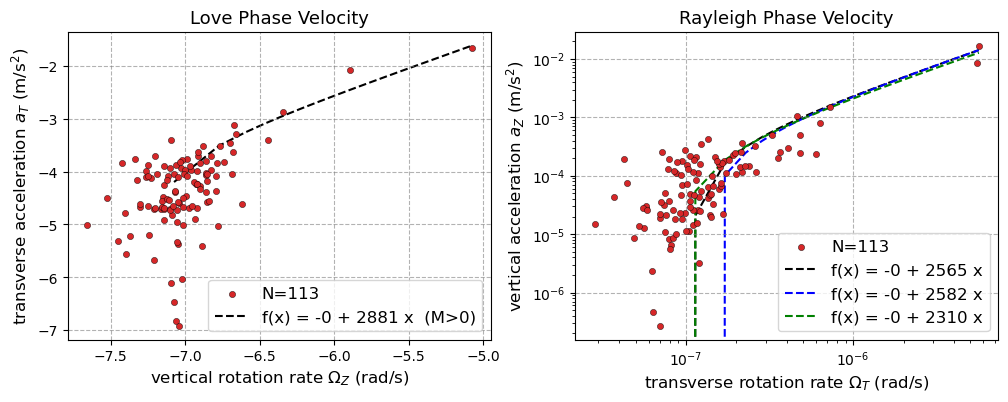

In [82]:
fig = __makeplot_velocity_multiple(data_amax_fmax_cosum_6, odr=True, loglog=True);

# fig.savefig(config['path_to_figs']+f"BSPF_statistics_velocity_multiple_lin.png", dpi=200, bbox_inches='tight', pad_inches=0.05);


-0.000270542940881672 2565.132066988272
-0.00033938072470737654 2581.4918380407485
-0.00018348098233442818 2881.9880945052837
-0.00015183315704903324 2875.9105594579555


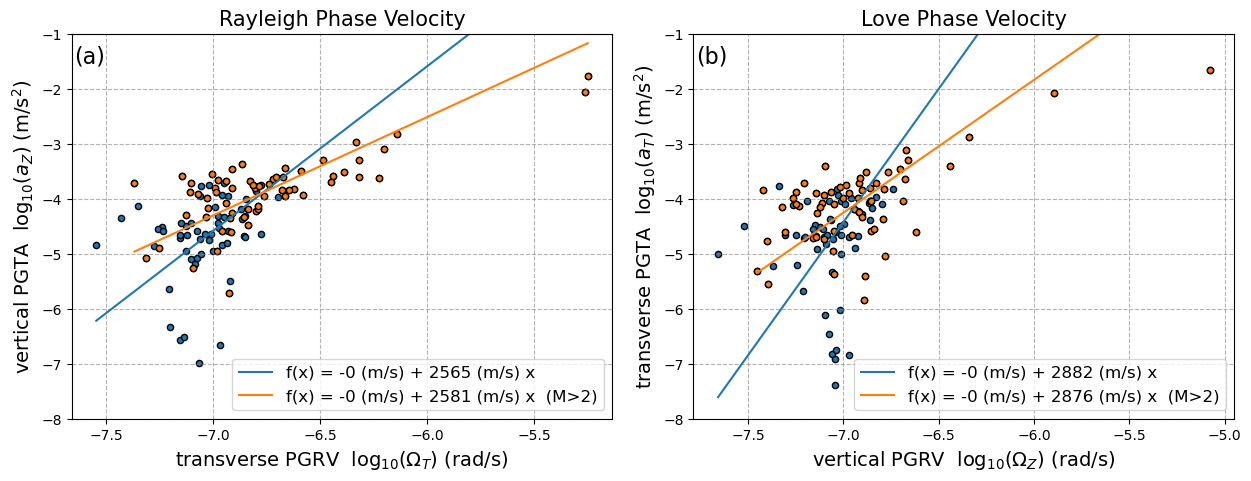

In [182]:
def __makeplot():

    def __regress2(x, y):

        xx = np.linspace(x.min(), x.max(), 100)

        ## linear regression
        b, a = __compute_orthogonal_distance_regression(x, y, xerr=None, yerr=None, bx=None, by=None)

        return xx, b, a


    Nrow, Ncol = 1, 2

    font = 14

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 5))

    plt.subplots_adjust(wspace=0.15)

    ## _________________________________________________________
    ##

    data0 = data_amax_fmax_cosum_6

    x_arr00 = data0.BSPF__T_amax
    y_arr00 = data0.PFO_10_Z_amax

    xx, b, a = __regress2(np.log10(x_arr00), np.log10(y_arr00))
    yy = a + b*xx

    _xx, _b, _a = __regress2(x_arr00, y_arr00)
    print(_a, _b)

    ax[0].scatter(np.log10(x_arr00), np.log10(y_arr00), edgecolor="k", s=20)
    ax[0].plot(xx, yy, label=f"f(x) = {_a:.0f} (m/s) + {_b:.0f} (m/s) x")

    ## _________________________________________________________
    ##

    data0 = data0 = data_amax_fmax_cosum_6[data_amax_fmax_cosum_6.Magnitude > 2]

    x_arr01 = data0.BSPF__T_amax
    y_arr01 = data0.PFO_10_Z_amax

    xx, b, a = __regress2(np.log10(x_arr01), np.log10(y_arr01))
    yy = a + b*xx

    _xx, _b, _a = __regress2(x_arr01, y_arr01)
    print(_a, _b)

    ax[0].scatter(np.log10(x_arr01), np.log10(y_arr01), edgecolor="k", s=20)
    ax[0].plot(xx, yy, label=f"f(x) = {_a:.0f} (m/s) + {_b:.0f} (m/s) x  (M>2)")

    ## _________________________________________________________
    ##

    ## _________________________________________________________
    ##

    data10 = data_amax_fmax_cosum_6

    x_arr10 = data10.BSPF__Z_amax
    y_arr10 = 0.5*data10.PFO_10_T_amax

    xx, b, a = __regress2(np.log10(x_arr10), np.log10(y_arr10))
    yy = a + b*xx

    _xx, _b, _a = __regress2(x_arr10, y_arr10)
    print(_a, _b)

    ax[1].scatter(np.log10(x_arr10), np.log10(y_arr10), edgecolor="k", s=20)
    ax[1].plot(xx, yy, label=f"f(x) = {_a:.0f} (m/s) + {_b:.0f} (m/s) x")

    ## _________________________________________________________
    ##

    data11 = data11 = data_amax_fmax_cosum_6[data_amax_fmax_cosum_6.Magnitude > 2]

    x_arr11 = data11.BSPF__Z_amax
    y_arr11 = 0.5*data11.PFO_10_T_amax

    xx, b, a = __regress2(np.log10(x_arr11), np.log10(y_arr11))
    yy = a + b*xx

    _xx, _b, _a = __regress2(x_arr11, y_arr11)
    print(_a, _b)

    ax[1].scatter(np.log10(x_arr11), np.log10(y_arr11), edgecolor="k", s=20)
    ax[1].plot(xx, yy, label=f"f(x) = {_a:.0f} (m/s) + {_b:.0f} (m/s) x  (M>2)")


    for _n in range(Ncol):
        ax[_n].grid(ls="--", color="grey", alpha=0.6, zorder=0)
        ax[_n].legend(loc=1)
        ax[_n].set_ylim(-8, -1)
        ax[_n].legend(loc=4, fontsize=font-2)

    ax[0].set_xlabel("transverse PGRV  log$_{10}$($\Omega_T$) (rad/s)", fontsize=font)
    ax[0].set_ylabel("vertical PGTA  log$_{10}$($a_Z$) (m/s$^2$)", fontsize=font)
    ax[0].set_title("Rayleigh Phase Velocity", fontsize=font+1)

    ax[1].set_xlabel("vertical PGRV  log$_{10}$($\Omega_Z$) (rad/s)", fontsize=font)
    ax[1].set_ylabel("transverse PGTA  log$_{10}$($a_T$) (m/s$^2$)", fontsize=font)
    ax[1].set_title("Love Phase Velocity", fontsize=font+1)

    ax[0].text(.005, .97, "(a)", ha='left', va='top', transform=ax[0].transAxes, fontsize=font+2)
    ax[1].text(.005, .97, "(b)", ha='left', va='top', transform=ax[1].transAxes, fontsize=font+2)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figs']+f"BSPF_statistics_velocity_multiple_lin.png", dpi=200, bbox_inches='tight', pad_inches=0.05);


In [119]:
data_amax_fmax_cosum_6

,Torigin,Magnitude,CoincidenceSum,Mag_type_x,BAZ_x,Edistance_km,Hdistance_km,origin_x,BSPF__E_amax,BSPF__N_amax,...,PFO_10_Z_fmax,RPFO_al_E_fmax,RPFO_al_N_fmax,RPFO_al_Z_fmax,RPFO_in_E_fmax,RPFO_in_N_fmax,RPFO_in_Z_fmax,RPFO_mi_E_fmax,RPFO_mi_N_fmax,RPFO_mi_Z_fmax
0,2022-10-01 05:36:11.240,1.13,6.0,ml,199.712618,14.252022,16.920240,2022-10-01 05:36:11.240,8.901524e-08,1.557008e-07,...,5.057,0.980,0.905,1.016,0.980,0.905,1.016,0.980,0.905,1.016
1,2022-10-01 21:26:43.530,2.08,6.0,ml,328.065144,48.053535,50.379154,2022-10-01 21:26:43.530,8.423352e-08,1.568107e-07,...,4.846,0.958,1.011,0.953,0.958,1.011,0.953,0.958,1.011,0.953
2,2022-10-02 03:25:16.440,1.49,6.0,ml,199.394033,14.850966,16.887652,2022-10-02 03:25:16.440,1.179629e-07,1.911775e-07,...,6.479,1.066,1.055,1.028,1.066,1.055,1.028,1.066,1.055,1.028
3,2022-10-02 15:51:37.180,1.68,6.0,ml,159.749086,15.423592,17.486703,2022-10-02 15:51:37.180,7.539872e-08,1.035255e-07,...,5.788,0.961,1.005,1.014,0.961,1.005,1.014,0.961,1.005,1.014
4,2022-10-02 21:52:54.280,0.99,6.0,ml,199.820062,14.772415,17.645021,2022-10-02 21:52:54.280,8.117327e-08,8.394493e-08,...,6.485,0.950,0.928,0.958,0.950,0.928,0.958,0.950,0.928,0.958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2023-09-11 11:15:03.740,0.84,6.0,ml,198.205436,13.948892,17.093449,2023-09-11 11:15:03.740,1.014771e-07,8.344789e-08,...,4.666,0.936,0.930,0.941,0.936,0.930,0.941,0.936,0.930,0.941
382,2023-09-13 05:24:01.760,2.10,6.0,ml,157.541581,33.292313,36.004753,2023-09-13 05:24:01.760,1.850097e-07,2.708296e-07,...,6.576,0.958,0.933,0.994,0.958,0.933,0.994,0.958,0.933,0.994
386,2023-09-16 12:17:55.550,1.55,6.0,ml,243.545551,31.685931,32.368045,2023-09-16 12:17:55.550,7.336958e-08,6.317327e-08,...,8.507,0.966,0.980,0.939,0.966,0.980,0.939,0.966,0.980,0.939
391,2023-09-19 00:35:13.890,1.30,6.0,ml,182.309542,7.823210,8.781954,2023-09-19 00:35:13.890,1.194672e-07,2.311056e-07,...,7.751,0.966,1.008,1.028,0.966,1.008,1.028,0.966,1.008,1.028
